In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns
import numpy as np
plt.style.use("fivethirtyeight")

# 1. Load data 

In [2]:
df = pd.read_csv('decision_df.csv')

In [3]:
df.head()

,siteRef,AADT5yearsAgo,AADT4yearsAgo,AADT3yearsAgo,AADT2yearsAgo,AADT1yearAgo,Hol_type,day,month,hour,dayOfweek,Conditions,lane,Maximum Temperature,predictions,actual
0,1610013,26815.0,29625.0,30355.0,29927.0,31569.0,SchoolDay,29,8,0,3,"Rain, Partially cloudy",Inc,15.1,105.4,0.0
1,1610013,26815.0,29625.0,30355.0,29927.0,31569.0,SchoolDay,29,8,1,3,"Rain, Partially cloudy",Inc,15.1,72.4,2.0
2,1610013,26815.0,29625.0,30355.0,29927.0,31569.0,SchoolDay,29,8,2,3,"Rain, Partially cloudy",Inc,15.1,38.6,0.0
3,1610013,26815.0,29625.0,30355.0,29927.0,31569.0,SchoolDay,29,8,3,3,"Rain, Partially cloudy",Inc,15.1,38.2,0.0
4,1610013,26815.0,29625.0,30355.0,29927.0,31569.0,SchoolDay,29,8,4,3,"Rain, Partially cloudy",Inc,15.1,85.8,62.0


# 2. Plot predicted and actual

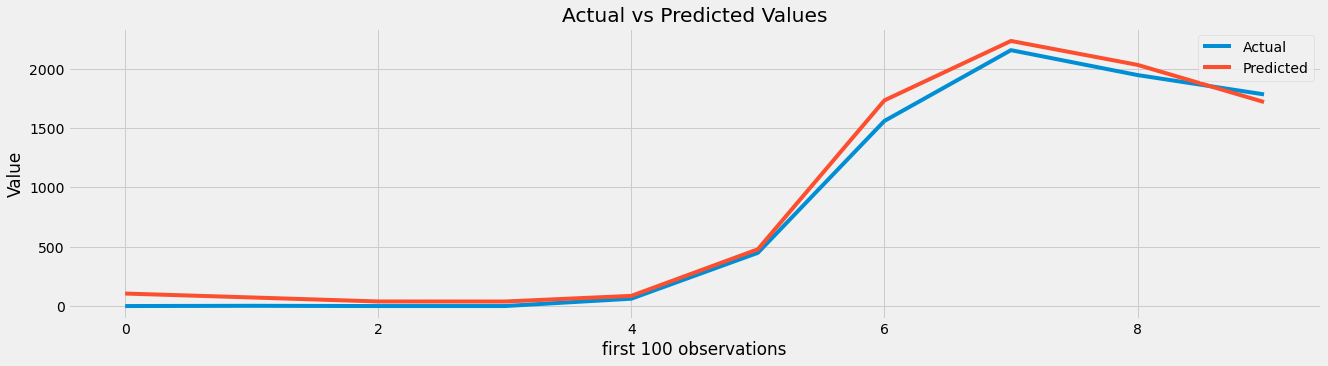

In [4]:
# plot actual and predicted values on the same plot
plt.figure(figsize=(20,5))
plt.plot(df['actual'][:10], label='Actual')
plt.plot(df['predictions'][:10], label='Predicted')

# add plot title and axis labels
plt.title('Actual vs Predicted Values')
plt.xlabel('first 100 observations')
plt.ylabel('Value')

# add legend to plot
plt.legend()

# display plot
plt.show()

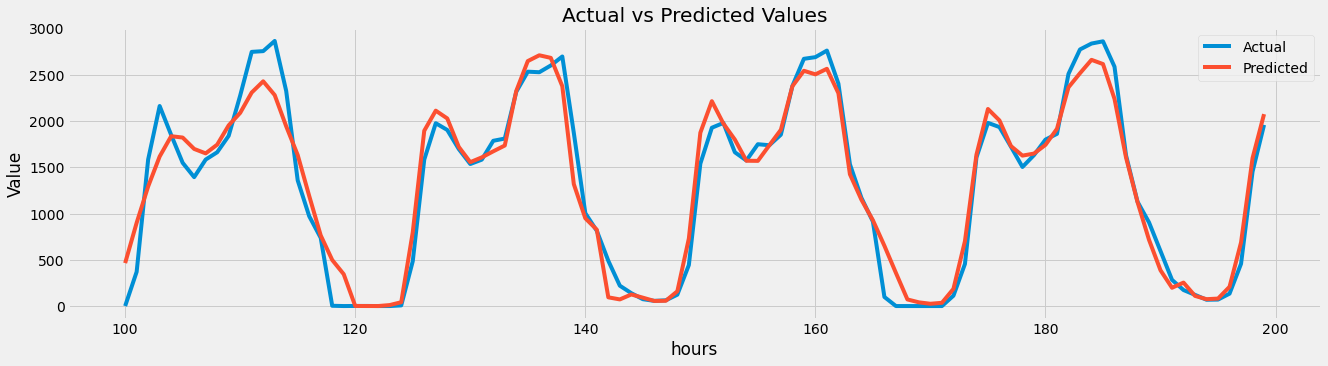

In [5]:
# plot actual and predicted values on the same plot
plt.figure(figsize=(20,5))
plt.plot(df['actual'][100:200], label='Actual')
plt.plot(df['predictions'][100:200], label='Predicted')

# add plot title and axis labels
plt.title('Actual vs Predicted Values')
plt.xlabel('hours')
plt.ylabel('Value')

# add legend to plot
plt.legend()

# display plot
plt.show()

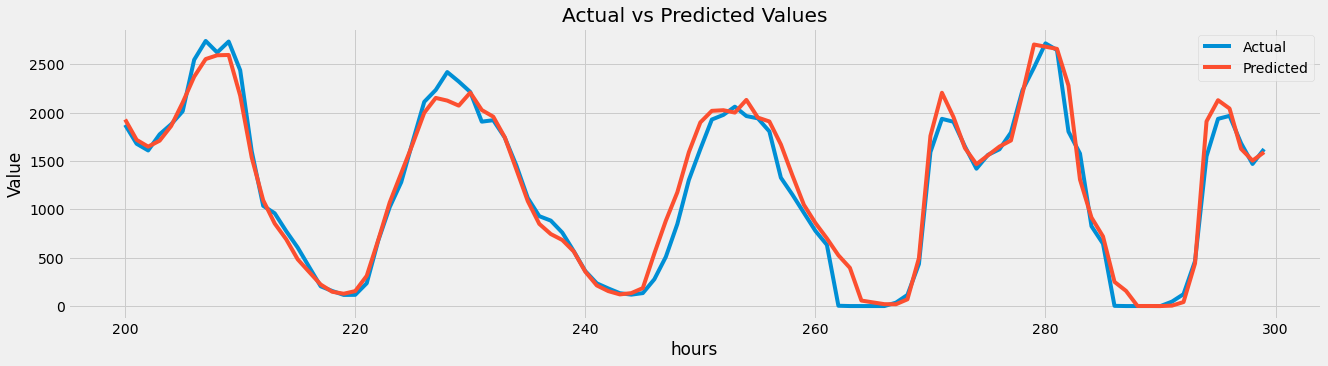

In [6]:
# plot actual and predicted values on the same plot
plt.figure(figsize=(20,5))
plt.plot(df['actual'][200:300], label='Actual')
plt.plot(df['predictions'][200:300], label='Predicted')

# add plot title and axis labels
plt.title('Actual vs Predicted Values')
plt.xlabel('hours')
plt.ylabel('Value')

# add legend to plot
plt.legend()

# display plot
plt.show()

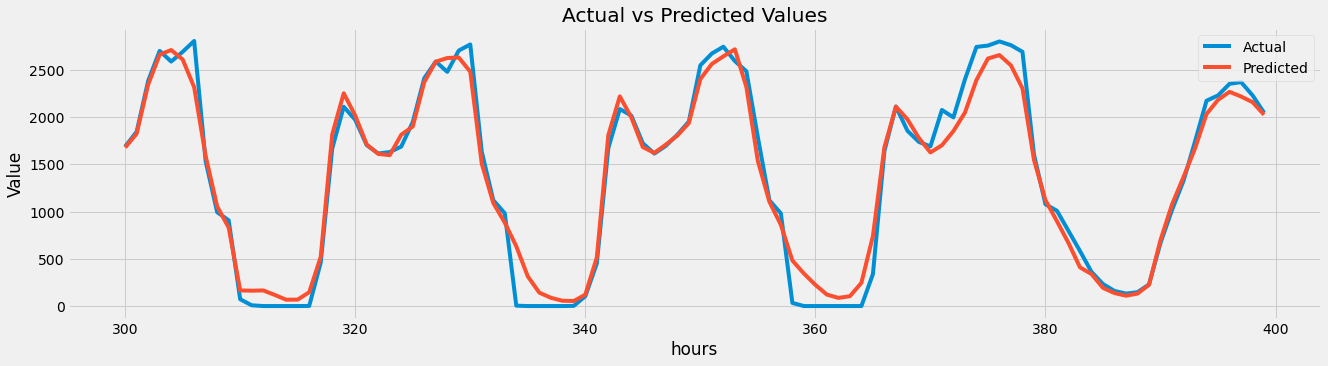

In [7]:
# plot actual and predicted values on the same plot
plt.figure(figsize=(20,5))
plt.plot(df['actual'][300:400], label='Actual')
plt.plot(df['predictions'][300:400], label='Predicted')

# add plot title and axis labels
plt.title('Actual vs Predicted Values')
plt.xlabel('hours')
plt.ylabel('Value')

# add legend to plot
plt.legend()

# display plot
plt.show()

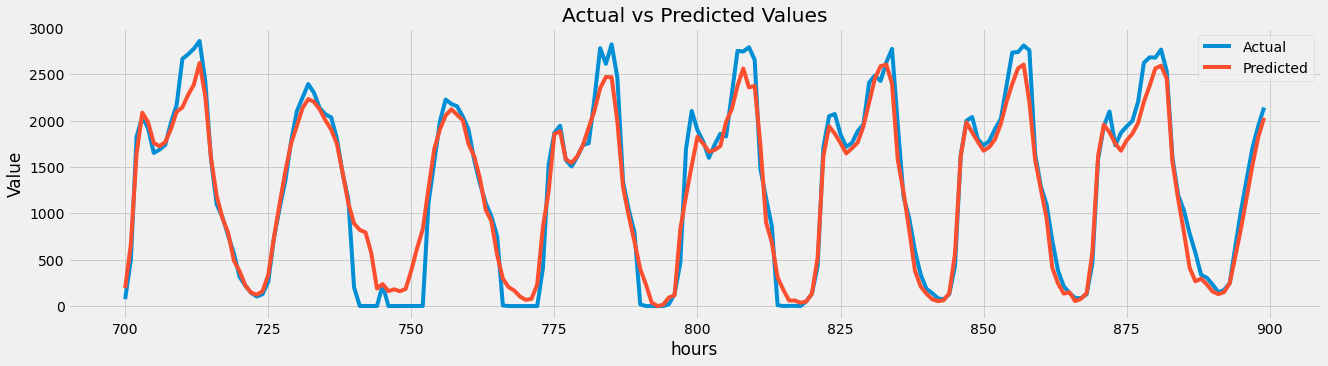

In [8]:
# plot actual and predicted values on the same plot
plt.figure(figsize=(20,5))
plt.plot(df['actual'][700:900], label='Actual')
plt.plot(df['predictions'][700:900], label='Predicted')

# add plot title and axis labels
plt.title('Actual vs Predicted Values')
plt.xlabel('hours')
plt.ylabel('Value')

# add legend to plot
plt.legend()

# display plot
plt.show()

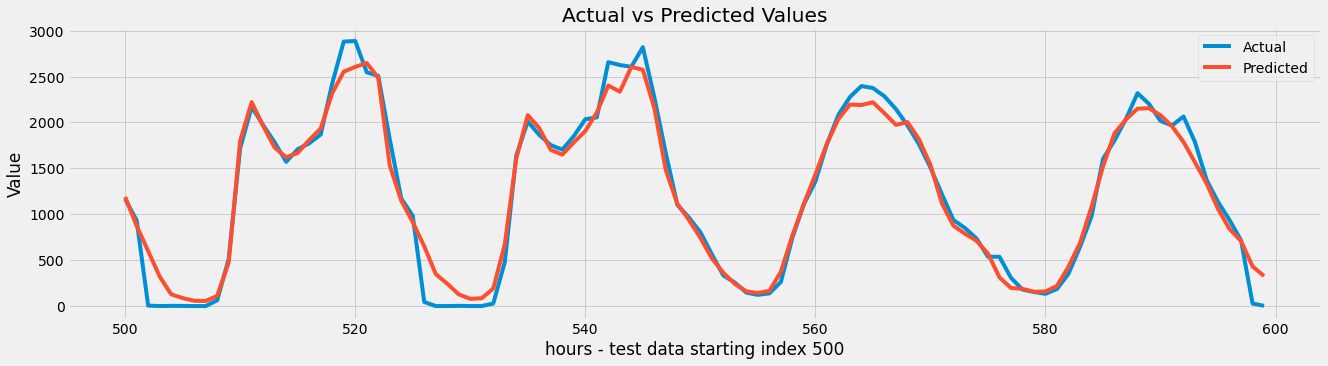

In [9]:
# plot actual and predicted values on the same plot
plt.figure(figsize=(20,5))
plt.plot(df['actual'][500:600], label='Actual')
plt.plot(df['predictions'][500:600], label='Predicted')

# add plot title and axis labels
plt.title('Actual vs Predicted Values')
plt.xlabel('hours - test data starting index 500')
plt.ylabel('Value')

# add legend to plot
plt.legend()

# display plot
plt.show()

Text(0.5, 1.0, 'Final model true values vs adjusted for test data')

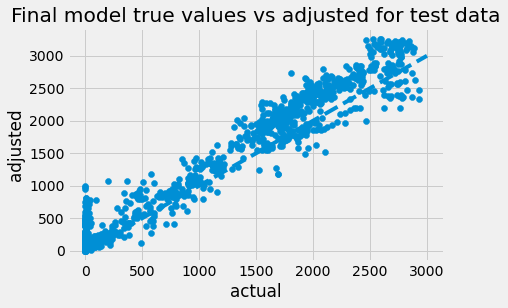

In [28]:
plt.scatter(df['actual'], df['adjusted'])
plt.plot([0, 3000], [0, 3000], "--", label="Perfect model")
plt.xlabel('actual')
plt.ylabel('adjusted')
plt.title('Final model true values vs adjusted for test data')



In [11]:
df['errors']=df['predictions']-df['actual']

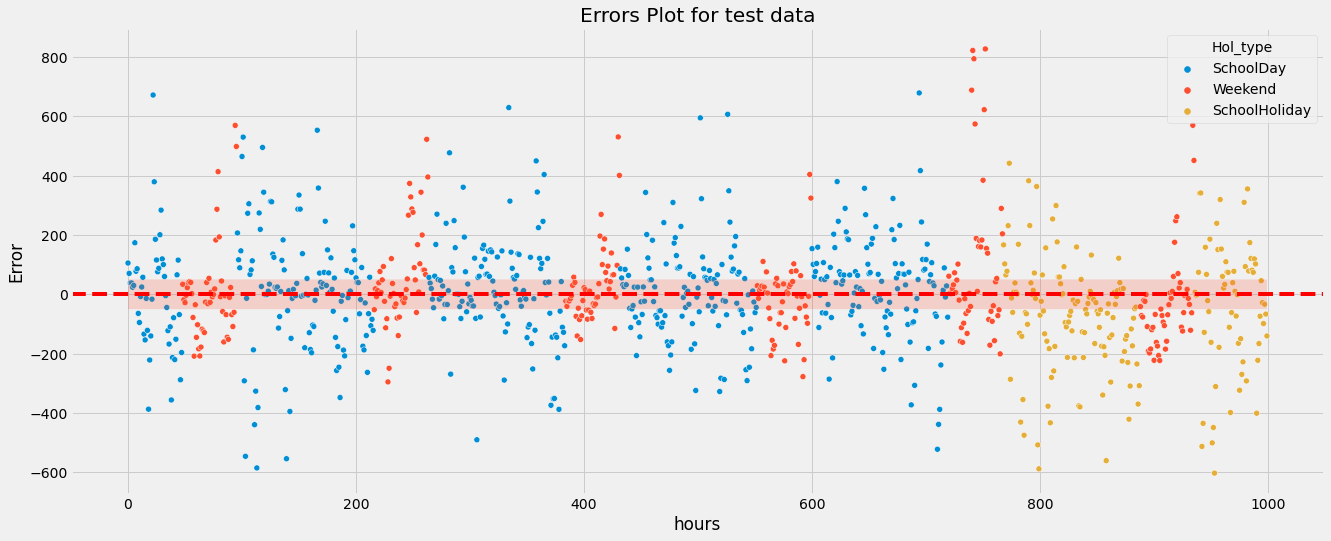

In [12]:
# set figure size
plt.figure(figsize=(20, 8))
# plot errors column as points with color coded by Hol_type
sns.scatterplot(data=df, x=df.index, y='errors', hue='Hol_type')

# add horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--')

# shade the area between y=25 and y=-25
plt.fill_between(df.index, -50, 50, alpha=0.2)

# add plot title and axis labels
plt.title('Errors Plot for test data')
plt.xlabel('hours')
plt.ylabel('Error')

# display plot
plt.show()

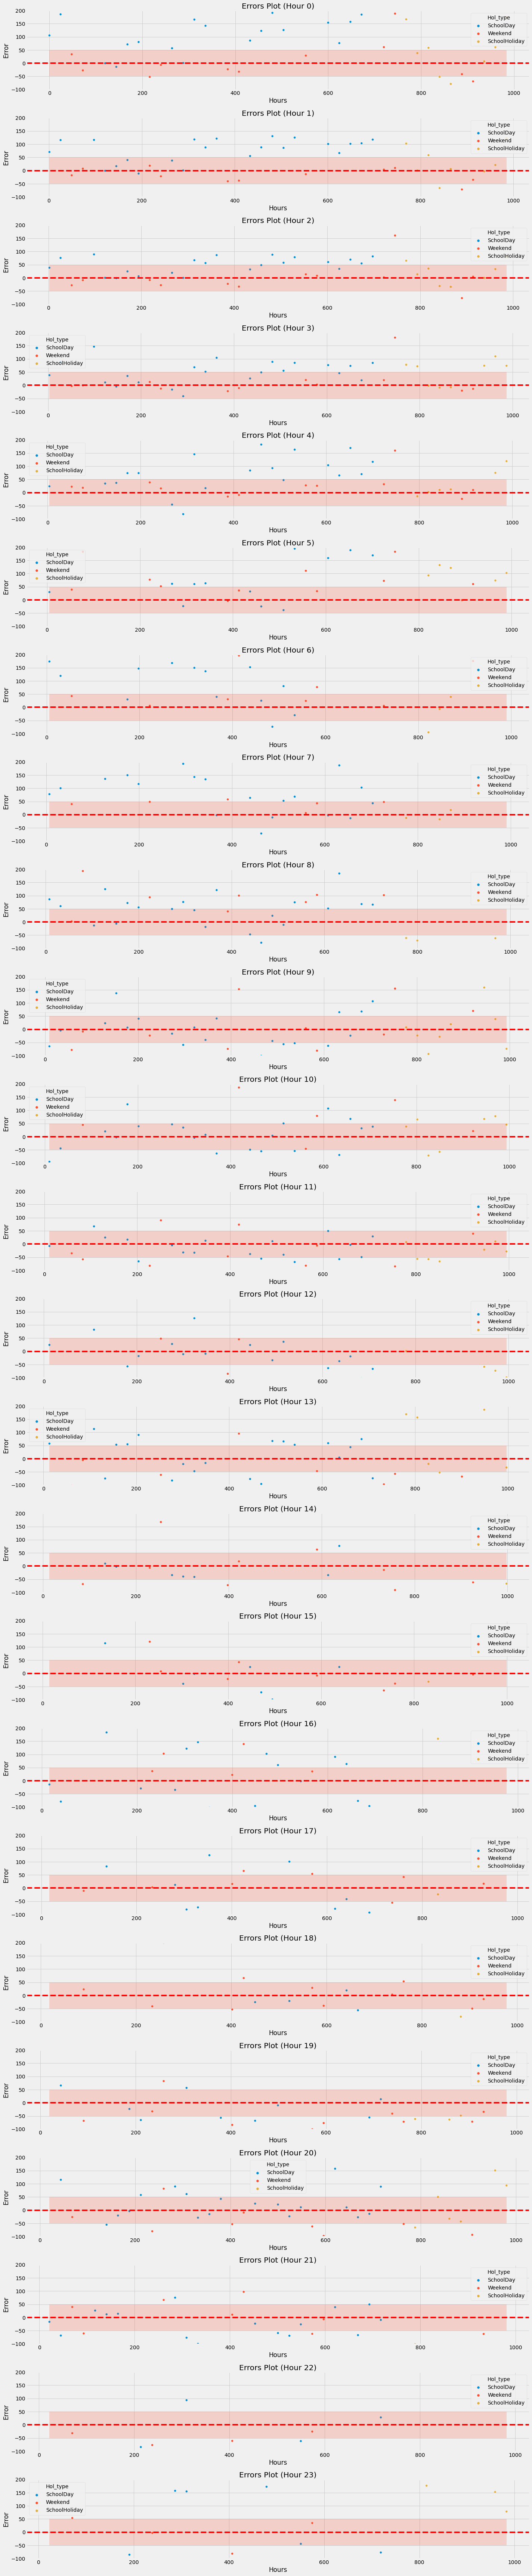

In [13]:
# get unique hour values
hours = df['hour'].unique()

# set up the subplots grid
fig, axes = plt.subplots(nrows=len(hours), ncols=1, figsize=(20, 4*len(hours)))

# set the y limit for the first subplot
ylim = (-100, 200)

# loop over subplots and plot each hour's data
for i, hour in enumerate(hours):
    # get subset of data for this hour
    group = df[df['hour'] == hour]
    
    # plot errors column as points with color coded by Hol_type
    sns.scatterplot(ax=axes[i], data=group, x=group.index, y='errors', hue='Hol_type')
    
    # add horizontal line at y=0
    axes[i].axhline(y=0, color='red', linestyle='--')
    
    # shade the area between y=25 and y=-25
    axes[i].fill_between(group.index, -50, 50, alpha=0.2)
    
    # set y limit for this subplot
    axes[i].set_ylim(ylim)
    
    # add plot title and axis labels
    axes[i].set_title(f'Errors Plot (Hour {hour})')
    axes[i].set_xlabel('Hours')
    axes[i].set_ylabel('Error')

# adjust spacing between subplots and display plot
plt.tight_layout()
plt.show()


In [14]:


# create a copy of the original predictions column to store the adjusted predictions
df['adjusted'] = df['predictions'].copy()

# loop over rows and adjust the predictions for hour 7 if the error is above the threshold and Hol_type is Schoolday
for i, row in df.iterrows():
    if row['hour'] == 7 and row['Hol_type'] == 'SchoolDay':
        df.at[i, 'adjusted'] = row['predictions'] * 1.2
    elif row['hour'] == 8 and row['Hol_type'] == 'SchoolDay':
        df.at[i, 'adjusted'] = row['predictions'] * 1.2
    elif row['Hol_type'] == 'SchoolDay':
        df.at[i, 'adjusted'] = row['predictions'] * 1.2 
    elif row['Hol_type'] == 'Weekend':
        df.at[i, 'adjusted'] = row['predictions'] * 1.2
    elif row['hour'] == 5 and row['Hol_type']== 'SchoolDay':
        df.at[i, 'adjusted'] = row['predictions'] * 1.2
    elif row['hour'] == 6 and row['Hol_type']== 'SchoolDay':
        df.at[i, 'adjusted'] = row['predictions'] * 1.2

# print adjusted predicted values
print(df['adjusted'])
print(df['predictions'])

df['adjusted_errors'] = df['adjusted'] - df['actual']
print(df['adjusted_errors'])

0       126.48
1        86.88
2        46.32
3        45.84
4       102.96
        ...   
995    1754.80
996    1845.40
997    1996.60
998    2390.40
999    2516.60
Name: adjusted, Length: 1000, dtype: float64
0       105.4
1        72.4
2        38.6
3        38.2
4        85.8
        ...  
995    1754.8
996    1845.4
997    1996.6
998    2390.4
999    2516.6
Name: predictions, Length: 1000, dtype: float64
0      126.48
1       84.88
2       46.32
3       45.84
4       40.96
        ...  
995    -28.20
996    -98.60
997    -33.40
998    -66.60
999   -140.40
Name: adjusted_errors, Length: 1000, dtype: float64


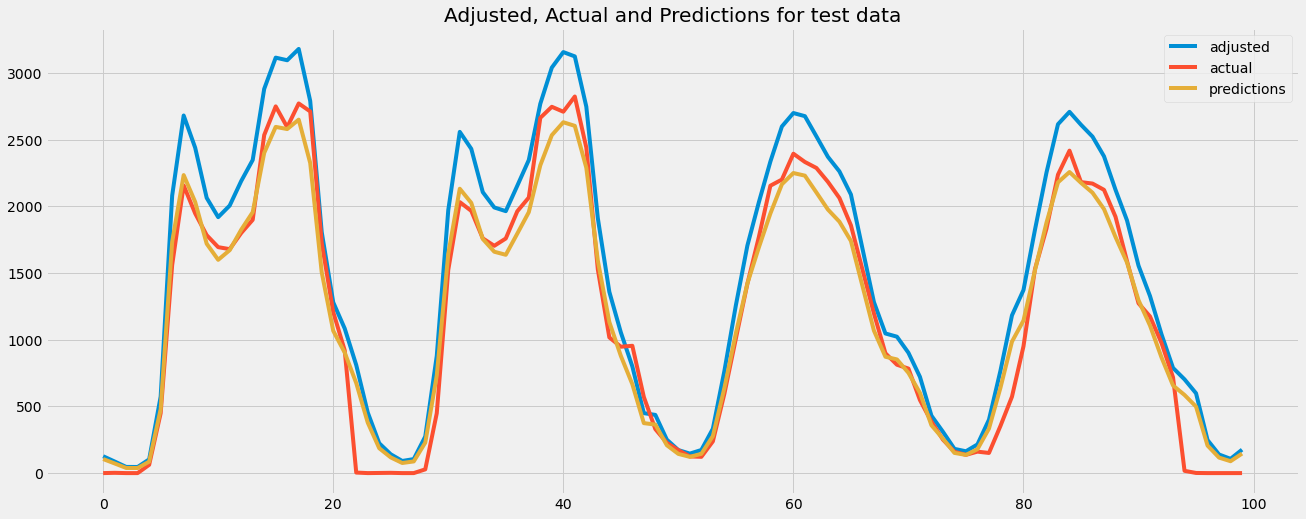

In [15]:
plt.figure(figsize=(20, 8))
plt.plot(df['adjusted'][:100],label='adjusted')
plt.plot(df['actual'][:100],label='actual')
plt.plot(df['predictions'][:100], label='predictions')
plt.title('Adjusted, Actual and Predictions for test data')

plt.legend()

# EFFICIENCY RATE

In [16]:
# Calculate the percentage of rows where adjusted prediction is greater than actual
num_greater = len(df[df['adjusted'] > (df['actual']-50)])
total_rows = len(df)
percent_greater = (num_greater / total_rows) * 100
print(f"Model Efficiency rate: {percent_greater:.2f}%")

Model Efficiency rate: 89.20%


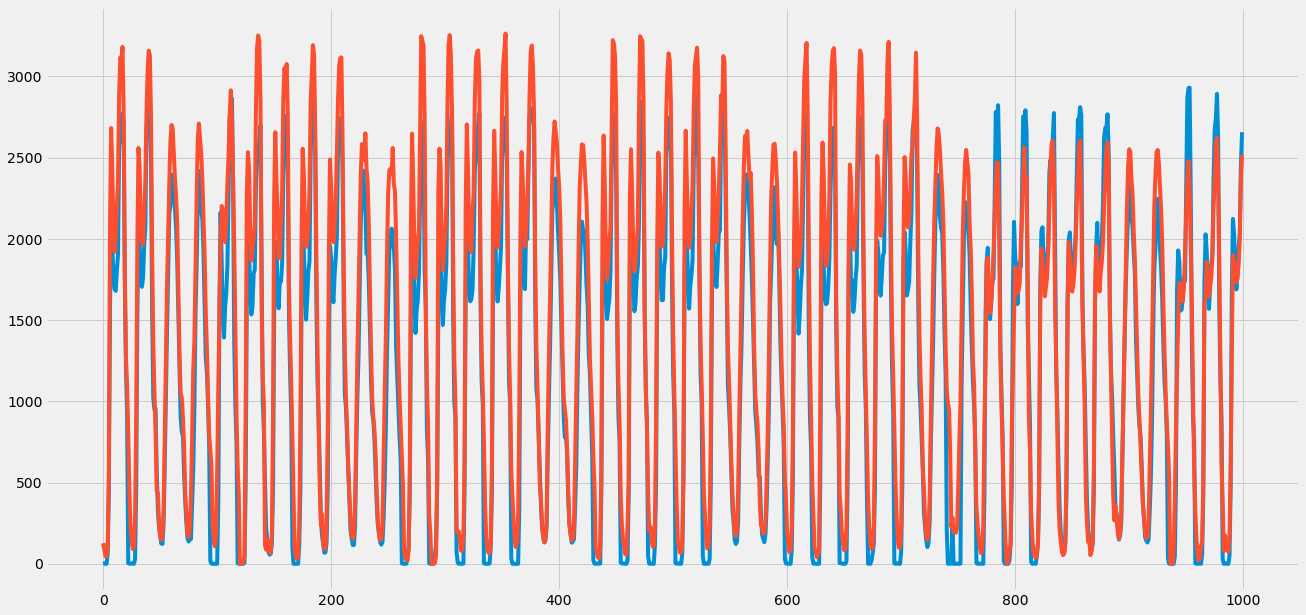

In [17]:
plt.figure(figsize=(20,10))
plt.plot(df['actual'])
plt.plot(df['adjusted'])

In [18]:
# calculate the mean and standard deviation of the counts in adjusted
mean = df["adjusted"].mean()
std = df["adjusted"].std()

# classify each row based on the counts in adjusted
def classify(row):
    if row["adjusted"] > mean:
        return 3
    elif row["adjusted"] < mean - std:
        return 1
    else:
        return 2

df["category"] = df.apply(classify, axis=1)

In [19]:
df.head()

,siteRef,AADT5yearsAgo,AADT4yearsAgo,AADT3yearsAgo,AADT2yearsAgo,AADT1yearAgo,Hol_type,day,month,hour,dayOfweek,Conditions,lane,Maximum Temperature,predictions,actual,errors,adjusted,adjusted_errors,category
0,1610013,26815.0,29625.0,30355.0,29927.0,31569.0,SchoolDay,29,8,0,3,"Rain, Partially cloudy",Inc,15.1,105.4,0.0,105.4,126.48,126.48,1
1,1610013,26815.0,29625.0,30355.0,29927.0,31569.0,SchoolDay,29,8,1,3,"Rain, Partially cloudy",Inc,15.1,72.4,2.0,70.4,86.88,84.88,1
2,1610013,26815.0,29625.0,30355.0,29927.0,31569.0,SchoolDay,29,8,2,3,"Rain, Partially cloudy",Inc,15.1,38.6,0.0,38.6,46.32,46.32,1
3,1610013,26815.0,29625.0,30355.0,29927.0,31569.0,SchoolDay,29,8,3,3,"Rain, Partially cloudy",Inc,15.1,38.2,0.0,38.2,45.84,45.84,1
4,1610013,26815.0,29625.0,30355.0,29927.0,31569.0,SchoolDay,29,8,4,3,"Rain, Partially cloudy",Inc,15.1,85.8,62.0,23.8,102.96,40.96,1


In [20]:
# calculate the mean and standard deviation of the counts in adjusted
mean_actual = df["actual"].mean()
std_actual = df["actual"].std()

# classify each row based on the counts in adjusted
def classify(row):
    if row["actual"] > mean:
        return 3
    elif row["actual"] < mean - std:
        return 1
    else:
        return 2

df["category_actual"] = df.apply(classify, axis=1)

In [21]:
# create a new column that indicates whether the predictions match or are lower
df["match"] = np.where(df["actual"] <= df["adjusted"], "match", "lower")

# calculate the percentage of rows where the predictions are not a match or a lower grade
mismatch_pct = 100 * (df["match"] == "match").mean()

print("Percentage of rows with mismatched or lower predictions: {:.2f}%".format(mismatch_pct))

Percentage of rows with mismatched or lower predictions: 84.80%


In [22]:
df['actual']

0         0.0
1         2.0
2         0.0
3         0.0
4        62.0
        ...  
995    1783.0
996    1944.0
997    2030.0
998    2457.0
999    2657.0
Name: actual, Length: 1000, dtype: float64

In [23]:
df['adjusted']

0       126.48
1        86.88
2        46.32
3        45.84
4       102.96
        ...   
995    1754.80
996    1845.40
997    1996.60
998    2390.40
999    2516.60
Name: adjusted, Length: 1000, dtype: float64

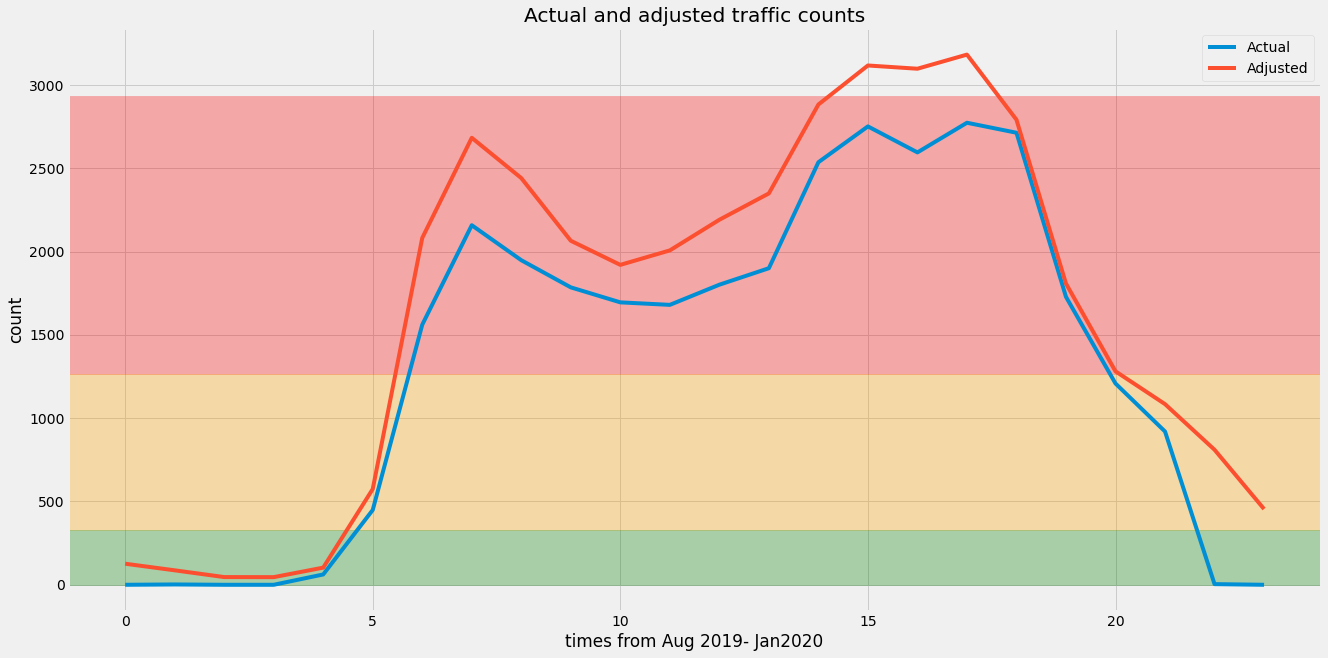

In [24]:
# calculate the mean and standard deviation of the counts in adjusted
mean_actual = df["actual"].mean()
std_actual = df["actual"].std()

# create a figure and axis object
fig, ax = plt.subplots(figsize=(20,10))

# plot the actual and adjusted series
ax.plot(df["actual"][:24], label="Actual")
ax.plot(df["adjusted"][:24], label="Adjusted")

# shade the y-axis based on the ranges
ax.axhspan(mean_actual, df["actual"].max(), alpha=0.3, color="red")
ax.axhspan(mean_actual-std_actual, mean_actual, alpha=0.3, color="orange")
ax.axhspan(df["actual"].min(), mean_actual-std_actual, alpha=0.3, color="green")

# set the axis labels and plot title
ax.set_xlabel("times from Aug 2019- Jan2020")
ax.set_ylabel("count")
ax.set_title("Actual and adjusted traffic counts")


# show the plot
plt.legend()
plt.show()